In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
p=Path('./pokemon')

dirs=p.glob('*')

image_data=[]
labels=[]

labels_dict={"Bulbasaur":1,"Meowth":2,"Pikachu":0}
label2name={"1":"Bulbasaur","2":"Meowth","0":"Pikachu"}

for folder_dir in dirs:
    pokemon_name=str(folder_dir).split('\\')[-1]
    
    cnt=0
    
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(40,40))  #we have resized every image to same size
        img_array=image.img_to_array(img)
        
        image_data.append(img_array)
        labels.append(labels_dict[pokemon_name])
        cnt+=1
    print(cnt)
        

176
70
199


In [3]:
import numpy as np

In [4]:
X=np.array(image_data,dtype=int)
Y=np.array(labels,dtype=int)


from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)

# normalization
X=X/255

In [5]:
def drawImg(img,label):
    print(label)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

2


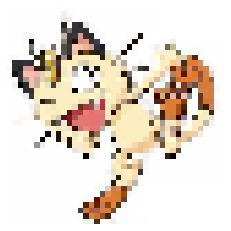

In [6]:
drawImg(X[103],Y[103])

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(333, 40, 40, 3)
(333,)
(112, 40, 40, 3)
(112,)


In [67]:
def softmax(z):
    ea=np.exp(z)
    ea=ea/(np.sum(ea,axis=1,keepdims=True))
    return ea
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        self.input_size=input_size
        self.layers=layers
        self.output_size=output_size
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
    
        self.model=model
        
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1) + b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2) + b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        m=float(x.shape[0])
        delta3=y_-y
        
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/m
            
        
        delta2=(1-np.square(a2))*(np.dot(delta3,W3.T))
        
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/m
        
        delta1=(1-np.square(a1))*(np.dot(delta2,W2.T))
        
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/m
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_=self.forward(x)
        
        return np.argmax(y_,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
        
        
        
        
        

In [56]:
# we need to convert the y into one hot encoding

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    
    y_oht[np.arange(m),y]=1
    
    return y_oht

In [57]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    


In [58]:
def train(x,y,model,epocs):
    losses=[]
    
    y_ohe=one_hot(y,3)
    for ix in range(epocs):
        y_=model.forward(x)
        l=loss(y_ohe,y_)
        
        losses.append(l)
        
        model.backward(x,y_ohe)
        if(ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    return losses

In [68]:
model=NeuralNetwork(4800,[100,50],3)

In [60]:
# flattening the images

In [61]:
x_train=x_train.reshape(x_train.shape[0],-1)
print(x_train.shape)

x_test=x_test.reshape(x_test.shape[0],-1)

print(x_test.shape)

(333, 4800)
(112, 4800)


In [69]:
l=train(x_train,y_train,model,500)

Epoch 0 Loss 3.4216
Epoch 50 Loss 0.6862
Epoch 100 Loss 0.4367
Epoch 150 Loss 0.6132
Epoch 200 Loss 0.3255
Epoch 250 Loss 0.2735
Epoch 300 Loss 0.2604
Epoch 350 Loss 0.2138
Epoch 400 Loss 0.2942
Epoch 450 Loss 0.1017


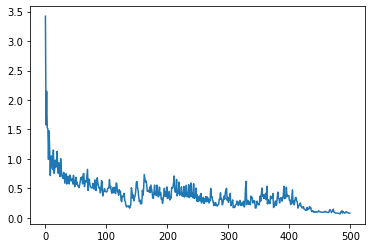

In [70]:
plt.plot(l)
plt.show()

In [73]:
output_train=model.predict(x_train)
train_acc=np.sum(output_train==y_train)/(y_train.shape[0])

output_test=model.predict(x_test)
test_acc=np.sum(output_test==y_test)/(y_test.shape[0])
print(train_acc)
print(test_acc)

0.9309309309309309
0.75
